<a href="https://colab.research.google.com/github/piotrkm/coordinates-postcodes-poland/blob/main/postal_codes_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Setting up data sets
`codes_list` - list of postal codes

`coordinates` - coordinates of all cities in Poland

`counties_list` - list of counties in Poland

In [25]:

# Link to the post codes data file
cades_file_path = "https://raw.githubusercontent.com/piotrkm/coordinates-postcodes-poland/main/"
cades_file_file = "kody-pocztowe-2024.csv"

# Data structure - rows names
data_columns_names = ['kod', 'adres', 'miejscowosc', 'wojewodztwo', 'powiat']

codes_list = pd.read_csv(cades_file_path + cades_file_file, names=data_columns_names, sep=';', skiprows=[0])

In [3]:
codes_list

,kod,adres,miejscowosc,wojewodztwo,powiat
0,00-001,"Poczta Warszawa 001, ul. Świętokrzyska 31/33",Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
1,00-001,ul. Świętokrzyska 31/33,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
2,00-002,ul. Świętokrzyska od 20 do 22,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
3,00-003,ul. Jasna od 9 do 17,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
4,00-004,ul. Marszałkowska od 136 do 138,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
...,...,...,...,...,...
43779,99-418,Poczta Filia UP Nieborów koło Łowicza,Bełchów,Województwo łódzkie,Powiat łowicki
43780,99-420,Poczta Łyszkowice,Łyszkowice,Województwo łódzkie,Powiat łowicki
43781,99-423,Poczta Bielawy koło Łowicza,Bielawy,Województwo łódzkie,Powiat łowicki
43782,99-434,Poczta Domaniewice,Domaniewice,Województwo łódzkie,Powiat łowicki


In [4]:
coordinates_file_path = "https://raw.githubusercontent.com/piotrkm/coordinates-postcodes-poland/main/"
coordinates_file_name = "wspolrzedne_miast.csv"

#Data structure columns_names
data_columns_names = ['miasto', 'long', 'lat']

coordinates = pd.read_csv(coordinates_file_path + coordinates_file_name, usecols=data_columns_names)

In [5]:
coordinates

,miasto,long,lat
0,Adamów (siedleckie),22.250000,51.750000
1,Adamów (zamojskie),23.166667,50.600000
2,Adamówka,22.700000,50.266667
3,Aleksandrów,19.983333,51.266667
4,Aleksandrów Kujawski,18.700000,52.883333
...,...,...,...
2313,Żyraków,21.416667,50.100000
2314,Żyrardów,20.433333,52.050000
2315,Żyrzyn,22.100000,51.500000
2316,Żytno,19.616667,50.933333


Graphical representation of the cities posiotions

(14.0, 24.2, 49.0, 55.0)

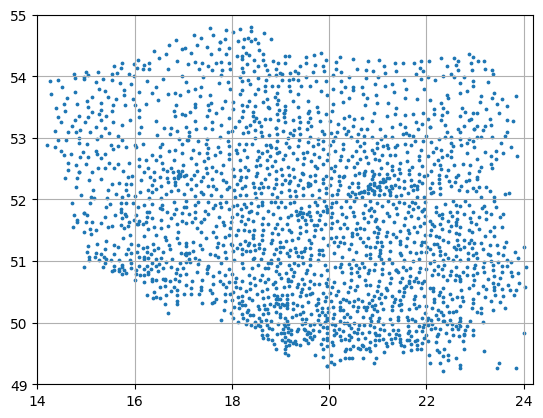

In [6]:
plt.scatter(coordinates["long"], coordinates["lat"], s=3)
plt.grid()
plt.axis([14, 24.2, 49, 55])

In [7]:
counties_path = "https://raw.githubusercontent.com/piotrkm/coordinates-postcodes-poland/main/"
counties_file = "lista_powiatow.csv"

#Data structure columns_names
data_columns_names = ['powiat','miasto','wojewodztwo','powierzchnia_km2','ludnosc']

counties = pd.read_csv(counties_path + counties_file, usecols=data_columns_names)


In [8]:
counties

,powiat,miasto,wojewodztwo,powierzchnia_km2,ludnosc
0,powiat aleksandrowski,Aleksandrów Kujawski,kujawsko-pomorskie,"474,63",55 007
1,powiat augustowski,Augustów,podlaskie,"1659,39",57 908
2,powiat bartoszycki,Bartoszyce,warmińsko-mazurskie,"1307,49",56 891
3,powiat bełchatowski,Bełchatów,łódzkie,"967,6",112 702
4,powiat będziński,Będzin,śląskie,"364,13",147 816
...,...,...,...,...,...
376,powiat żniński,Żnin,kujawsko-pomorskie,"984,77",70 070
377,Żory,Żory,śląskie,"64,64",62 670
378,powiat żuromiński,Żuromin,mazowieckie,"806,6",38 337
379,powiat żyrardowski,Żyrardów,mazowieckie,"532,54",75 616


# Processing counties data - assigining geographical coordinates to counties (more preciselly to countie's capitals)

1. Adding two columns to the counties data set
- longitude `long` (with default value 0)
- lattitude `lat` (with default value 0)

In [9]:
# 1 Adding two columns to the county data set

counties.insert(5, 'long', 0)
counties.insert(6, 'lat', 0)

In [10]:
n,c = counties.shape

print(f"Counties data set shape:\nnumbenr of rows: {n},\nnumber of columns: {c}")

Counties data set shape:
numbenr of rows: 381,
number of columns: 7


In [11]:
# 2. Walking through the counties data set and assigning to them geographical coordinates

# Print all cities which are not found in coordinate database.

for item in range(0,n):
  one_coordinate = coordinates.loc[coordinates['miasto'] == counties.at[item, 'miasto']].values
  if len(one_coordinate) == 0:
    print(f"Row: {item}, Record: {one_coordinate}, miasto: {counties.at[item, 'miasto']}, powiat:{counties.at[item, 'powiat']}")



#  counties.at[item, 'long'] = one_coordinate[0][1]
#  counties.at[item, 'lat'] = one_coordinate[0][2]

Row: 7, Record: [], miasto: Białobrzegi, powiat:powiat białobrzeski
Row: 14, Record: [], miasto: Bieruń, powiat:powiat bieruńsko-lędziński
Row: 18, Record: [], miasto: Bolesławiec, powiat:powiat bolesławiecki
Row: 20, Record: [], miasto: Brodnica, powiat:powiat brodnicki
Row: 23, Record: [], miasto: Brzeziny, powiat:powiat brzeziński
Row: 25, Record: [], miasto: Busko-Zdrój, powiat:powiat buski
Row: 37, Record: [], miasto: Chrzanów, powiat:powiat chrzanowski
Row: 85, Record: [], miasto: Jarocin, powiat:powiat jarociński
Row: 111, Record: [], miasto: Kolno, powiat:powiat kolneński
Row: 197, Record: [], miasto: Olesno, powiat:powiat oleski
Row: 198, Record: [], miasto: Oleśnica, powiat:powiat oleśnicki
Row: 203, Record: [], miasto: Opatów, powiat:powiat opatowski
Row: 268, Record: [], miasto: Sępolno Krajeńskie, powiat:powiat sępoleński
Row: 278, Record: [], miasto: Sławno, powiat:powiat sławieński
Row: 279, Record: [], miasto: Słubice, powiat:powiat słubicki
Row: 290, Record: [], miasto

In [12]:
# Handly repaired data

# Counties with discrapancy in the county-capital name
counties.at[7,  'miasto'] = "Białobrzegi (radomskie)"
counties.at[18, 'miasto'] = "Bolesławiec (jeleniog.)"
counties.at[20, 'miasto'] = "Brodnica (toruńskie)"
counties.at[23, 'miasto'] = "Brzeziny (skierniewic.)"
counties.at[25, 'miasto'] = "Busko Zdrój"
counties.at[37, 'miasto'] = "Chrzanów (katowickie)"

# Counties where cities were not found and geographical coordinates are defined handly

counties.at[14,  'lat'], counties.at[14,   'long'] = [50.09001524672474, 19.092549486466282]
counties.at[85,  'lat'], counties.at[85,   'long'] = [51.97275530144941, 17.501590477175956]
counties.at[111, 'lat'], counties.at[111,  'long'] = [53.40944432456515, 21.933104241846802]
counties.at[197, 'lat'], counties.at[197,  'long'] = [50.87467629165172, 18.415830300769855]
counties.at[198, 'lat'], counties.at[198,  'long'] = [51.20913080844487, 17.384974215796802]
counties.at[203, 'lat'], counties.at[203,  'long'] = [50.80197125313555, 21.42375324356977 ]
counties.at[268, 'lat'], counties.at[268,  'long'] = [53.45091145515121, 17.53148072591074 ]
counties.at[278, 'lat'], counties.at[278,  'long'] = [54.36216525685458, 16.67742568094564 ]
counties.at[279, 'lat'], counties.at[279,  'long'] = [52.35112135564631, 14.560241193047476]
counties.at[290, 'lat'], counties.at[290,  'long'] = [53.33585172429097, 15.04570363830838 ]
counties.at[311, 'lat'], counties.at[311,  'long'] = [50.84329934922147, 16.490396575475945]



In [13]:
# Asigning coordinates to counties records again, when data is repaired

for item in range(0,n):
  one_coordinate = coordinates.loc[coordinates['miasto'] == counties.at[item, 'miasto']].values
  if len(one_coordinate) > 0:
    counties.at[item, 'long'] = one_coordinate[0][1]
    counties.at[item, 'lat'] = one_coordinate[0][2]

In [14]:
counties


,powiat,miasto,wojewodztwo,powierzchnia_km2,ludnosc,long,lat
0,powiat aleksandrowski,Aleksandrów Kujawski,kujawsko-pomorskie,"474,63",55 007,18.700000,52.883333
1,powiat augustowski,Augustów,podlaskie,"1659,39",57 908,22.966667,53.850000
2,powiat bartoszycki,Bartoszyce,warmińsko-mazurskie,"1307,49",56 891,20.800000,54.250000
3,powiat bełchatowski,Bełchatów,łódzkie,"967,6",112 702,19.366667,51.366667
4,powiat będziński,Będzin,śląskie,"364,13",147 816,19.133333,50.316667
...,...,...,...,...,...,...,...
376,powiat żniński,Żnin,kujawsko-pomorskie,"984,77",70 070,17.716667,52.850000
377,Żory,Żory,śląskie,"64,64",62 670,18.700000,50.050000
378,powiat żuromiński,Żuromin,mazowieckie,"806,6",38 337,19.900000,53.066667
379,powiat żyrardowski,Żyrardów,mazowieckie,"532,54",75 616,20.433333,52.050000


In [15]:
# Again we get back to the original names of the changed cities

counties.at[7,  'miasto'] = "Białobrzegi"
counties.at[18, 'miasto'] = "Bolesławiec"
counties.at[20, 'miasto'] = "Brodnica"
counties.at[23, 'miasto'] = "Brzeziny"
counties.at[25, 'miasto'] = "Busko Zdrój"
counties.at[37, 'miasto'] = "Chrzanów"

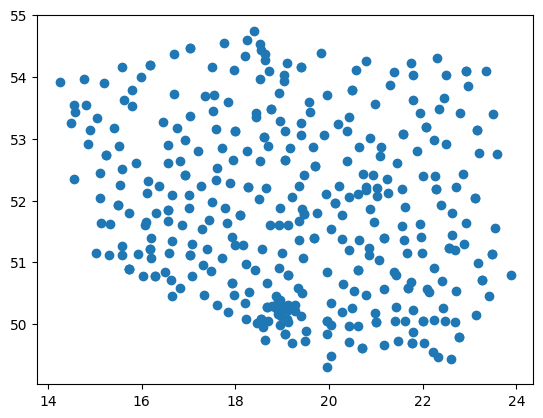

In [16]:
plt.scatter(counties['long'], counties['lat'])

# Associating counties capital's coordinates with postal codes.

1. The first oparation is to change phrase "Miasto *_city_name_* na prawach powiatu" to *_city_name_* only

In [17]:
codes_list

,kod,adres,miejscowosc,wojewodztwo,powiat
0,00-001,"Poczta Warszawa 001, ul. Świętokrzyska 31/33",Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
1,00-001,ul. Świętokrzyska 31/33,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
2,00-002,ul. Świętokrzyska od 20 do 22,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
3,00-003,ul. Jasna od 9 do 17,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
4,00-004,ul. Marszałkowska od 136 do 138,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu
...,...,...,...,...,...
43779,99-418,Poczta Filia UP Nieborów koło Łowicza,Bełchów,Województwo łódzkie,Powiat łowicki
43780,99-420,Poczta Łyszkowice,Łyszkowice,Województwo łódzkie,Powiat łowicki
43781,99-423,Poczta Bielawy koło Łowicza,Bielawy,Województwo łódzkie,Powiat łowicki
43782,99-434,Poczta Domaniewice,Domaniewice,Województwo łódzkie,Powiat łowicki


In [31]:
n,c = codes_list.shape
print(f"The codes_list data set shape:\nnumbenr of rows: {n},\nnumber of columns: {c}")

The codes_list data set shape:
numbenr of rows: 43784,
number of columns: 6


In [32]:
# inserting additional column
codes_list.insert(5, 'powiat_modified', '')

ValueError: cannot insert powiat_modified, already exists

In [33]:
# Removing unwanted part of phrase in the county name in special case when a city is a county itself

for item in range(0,n):
  county_name = codes_list.at[item, 'powiat']
  county_name = county_name.replace('Miasto ', '')
  county_name = county_name.replace(' na prawach powiatu', '')
  county_name = county_name.replace('Powiat', 'powiat')
  codes_list.at[item, 'powiat_modified'] = county_name

In [36]:
codes_list

,kod,adres,miejscowosc,wojewodztwo,powiat,powiat_modified
0,00-001,"Poczta Warszawa 001, ul. Świętokrzyska 31/33",Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
1,00-001,ul. Świętokrzyska 31/33,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
2,00-002,ul. Świętokrzyska od 20 do 22,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
3,00-003,ul. Jasna od 9 do 17,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
4,00-004,ul. Marszałkowska od 136 do 138,Warszawa,Województwo mazowieckie,Miasto Warszawa na prawach powiatu,Warszawa
...,...,...,...,...,...,...
43779,99-418,Poczta Filia UP Nieborów koło Łowicza,Bełchów,Województwo łódzkie,Powiat łowicki,powiat łowicki
43780,99-420,Poczta Łyszkowice,Łyszkowice,Województwo łódzkie,Powiat łowicki,powiat łowicki
43781,99-423,Poczta Bielawy koło Łowicza,Bielawy,Województwo łódzkie,Powiat łowicki,powiat łowicki
43782,99-434,Poczta Domaniewice,Domaniewice,Województwo łódzkie,Powiat łowicki,powiat łowicki


# Final associating `powiat_modified` from the postal codes collection with the county's coordinate data base

In [39]:
# adding two addtitional 'long' and 'lat' columns to the codes_list data frame

codes_list.insert(6, 'long', 0)
codes_list.insert(7, 'lat', 0)

In [52]:
# Assigining geographical coordinates to the postal codes recors

for item in range(0,n):
  county_one = counties.loc[counties['powiat'] == codes_list.at[item, 'powiat_modified']]
  long_, lat_ = county_one['long'].values, county_one['lat'].values
  codes_list.at[item, 'long'] = long_[0]
  codes_list.at[item, 'lat'] = lat_[0]

In [61]:
# Writing codes to separated CSV file.

codes_list.to_csv('codes_list.csv', sep=';', index=False)

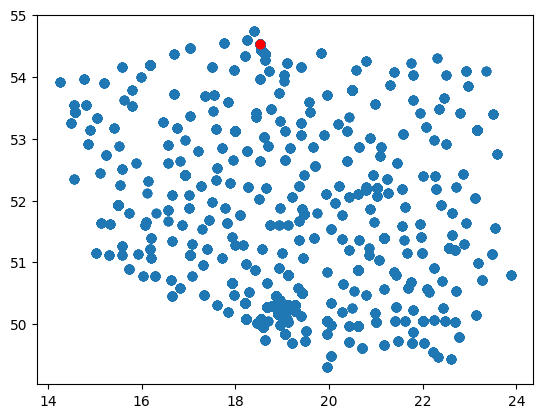

In [59]:
plt.scatter(codes_list['long'], codes_list['lat'])

Gdynia = codes_list.loc[codes_list['kod'] == '81-347']

plt.scatter(Gdynia['long'], Gdynia['lat'], c='red')


In [58]:
Gdynia

,kod,adres,miejscowosc,wojewodztwo,powiat,powiat_modified,long,lat
37378,81-347,ul. Świętego Piotra,Gdynia,Województwo pomorskie,Miasto Gdynia na prawach powiatu,Gdynia,18.533333,54.533333
37379,81-347,ul. Świętego Wojciecha,Gdynia,Województwo pomorskie,Miasto Gdynia na prawach powiatu,Gdynia,18.533333,54.533333
